# Netflix Recommendation System Dos
## Juan Alberto Vázquez Hernández - 220083

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df1 = pd.read_csv('netflix_tv_shows_detailed_up_to_2025.csv')
df2 = pd.read_csv('netflix_movies_detailed_up_to_2025.csv')

df1['type'] = 'TV Show'
df2['type'] = 'Movie'

netflix_dataset_2025 = pd.concat([df1, df2], ignore_index=True)
netflix_dataset_2025.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,33238,TV Show,Running Man,안재철,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",South Korea,2010-07-11,2010,8.241,1 Seasons,"Comedy, Reality",ko,A reality and competition show where members a...,1929.898,187,8.241,NaN,NaN
1,32415,TV Show,Conan,NaN,"Conan O'Brien, Andy Richter",United States of America,2010-11-08,2010,7.035,1 Seasons,"Talk, Comedy, News",en,A late night television talk show hosted by C...,1670.580,229,7.035,NaN,NaN
2,37757,TV Show,MasterChef Greece,NaN,NaN,Greece,2010-10-03,2010,5.600,1 Seasons,Reality,el,MasterChef Greece is a Greek competitive cooki...,1317.092,6,5.600,NaN,NaN
3,75685,TV Show,Prostřeno!,NaN,"Václav Vydra, Jana Boušková",Czech Republic,2010-03-01,2010,6.500,1 Seasons,Reality,cs,The knives (and forks) are out as a group of s...,1095.776,6,6.500,NaN,NaN
4,33847,TV Show,The Talk,NaN,"Amanda Kloots, Jerry O'Connell, Akbar Gbaja-Bi...","United States of America, Ireland",2010-10-18,2010,3.400,1 Seasons,Talk,en,A panel of well-known news and entertainment p...,712.070,12,3.400,NaN,NaN


In [ ]:
netflix_dataset_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       32000 non-null  int64  
 1   type          32000 non-null  object 
 2   title         32000 non-null  object 
 3   director      20903 non-null  object 
 4   cast          30639 non-null  object 
 5   country       29737 non-null  object 
 6   date_added    32000 non-null  object 
 7   release_year  32000 non-null  int64  
 8   rating        32000 non-null  float64
 9   duration      16000 non-null  object 
 10  genres        30919 non-null  object 
 11  language      32000 non-null  object 
 12  description   28662 non-null  object 
 13  popularity    32000 non-null  float64
 14  vote_count    32000 non-null  int64  
 15  vote_average  32000 non-null  float64
 16  budget        16000 non-null  float64
 17  revenue       16000 non-null  float64
dtypes: float64(5), int64(3), o

In [ ]:
dict = {}
for i in list(netflix_dataset_2025.columns):
    dict[i] = netflix_dataset_2025[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["unique count"]).transpose())

              unique count
show_id              31594
type                     2
title                30639
director             13011
cast                 30230
country               1745
date_added            5504
release_year            16
rating                2728
duration                 1
genres                3895
language                83
description          28636
popularity           24159
vote_count            2902
vote_average          2728
budget                 958
revenue               5327


In [ ]:
print('Table of missing values: ')
print(netflix_dataset_2025.isnull().sum())

Table of missing values: 
show_id             0
type                0
title               0
director        11097
cast             1361
country          2263
date_added          0
release_year        0
rating              0
duration        16000
genres           1081
language            0
description      3338
popularity          0
vote_count          0
vote_average        0
budget          16000
revenue         16000
dtype: int64


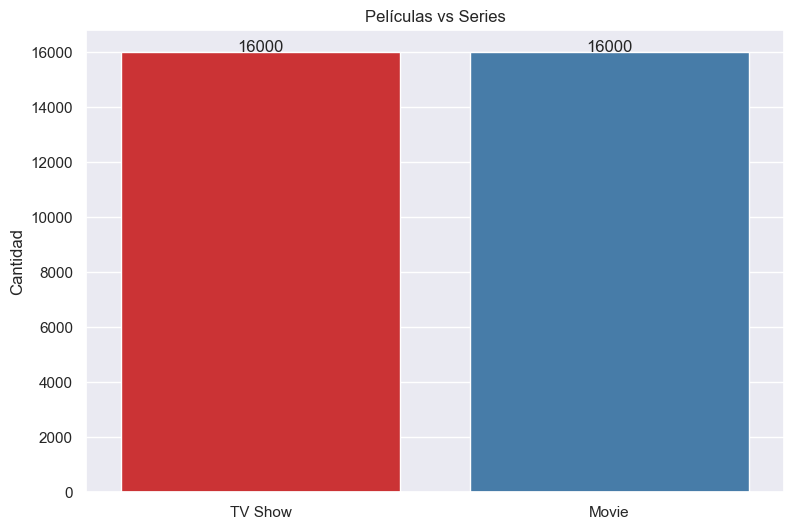

In [ ]:
netflix_shows_25=netflix_dataset_2025[netflix_dataset_2025['type']=='TV Show']
netflix_movies_25=netflix_dataset_2025[netflix_dataset_2025['type']=='Movie']

plt.figure(figsize=(9,6))
sns.countplot(data=netflix_dataset_2025, x='type', palette="Set1")
plt.title('Películas vs Series')
plt.xlabel('')
plt.ylabel('Cantidad')
for p in plt.gca().patches:
    plt.text(p.get_x()+p.get_width()/2, p.get_height()+5, int(p.get_height()), ha='center')
plt.show()

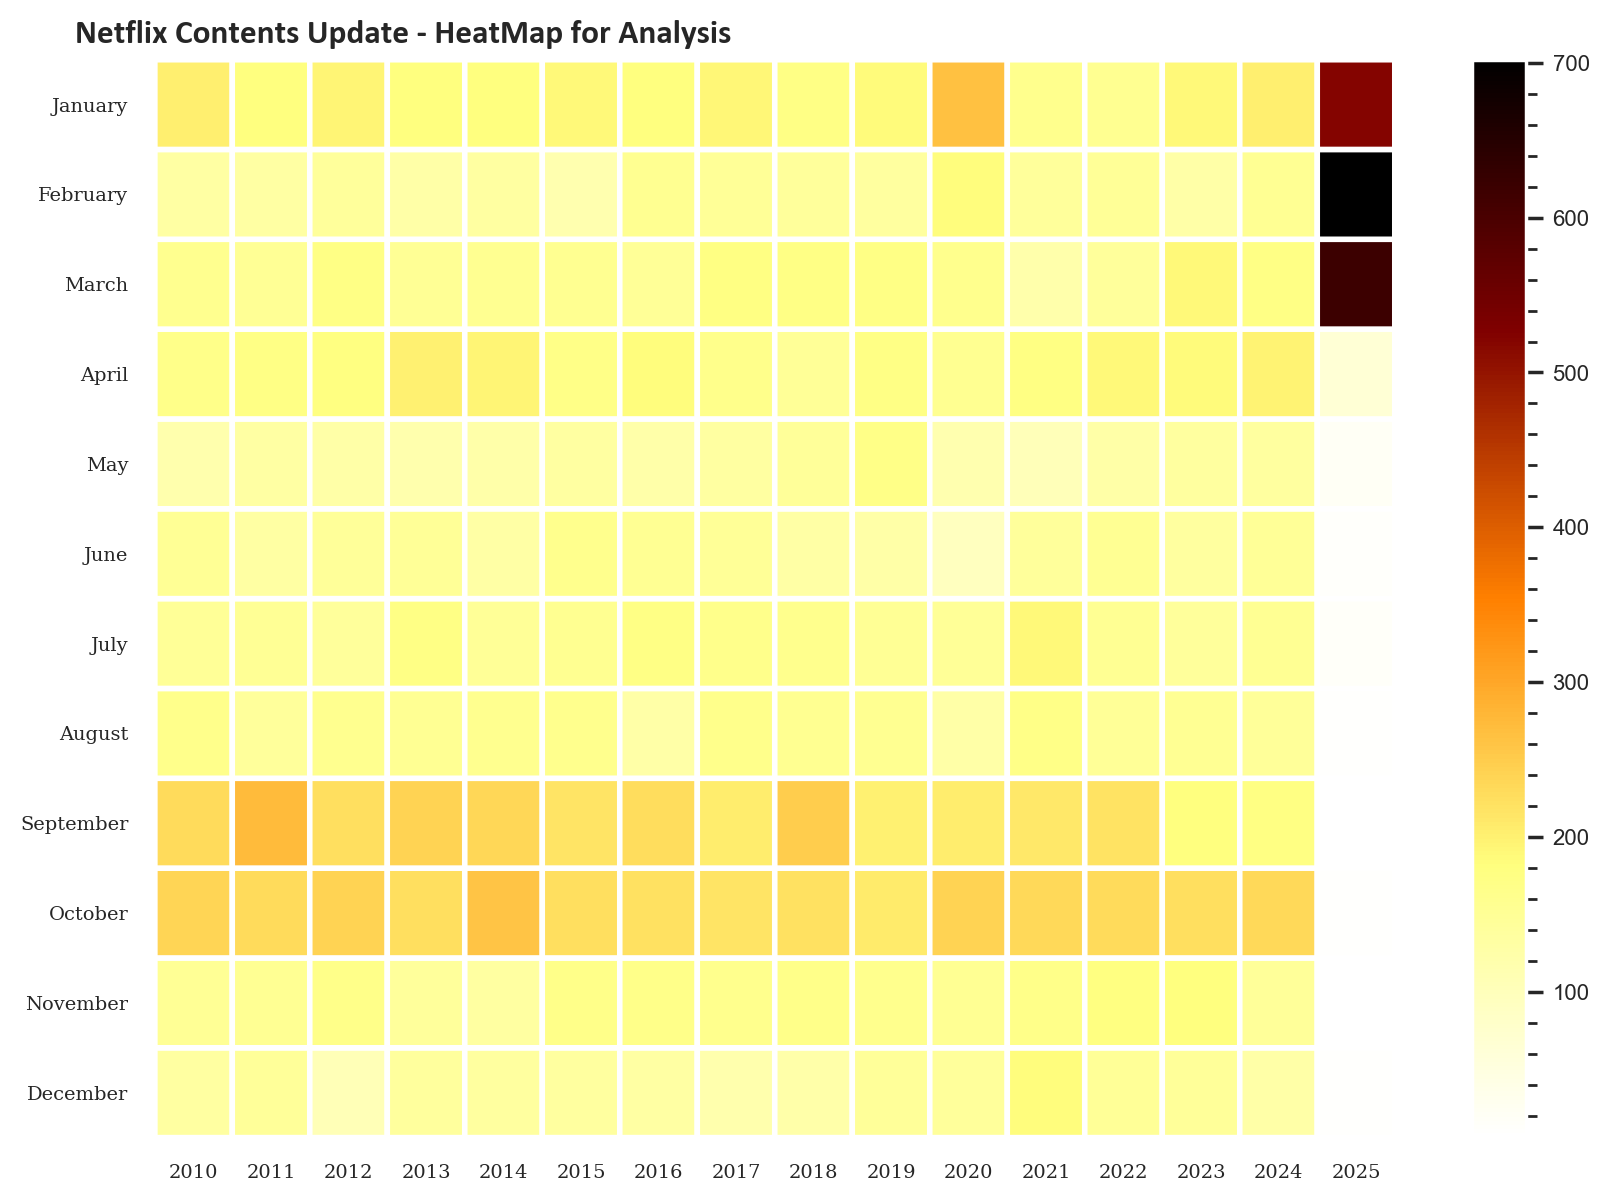

In [ ]:
# Convertir a datetime, ignorar errores
netflix_date = netflix_dataset_2025[['date_added']].dropna()
netflix_date['date_added'] = pd.to_datetime(netflix_date['date_added'], errors='coerce')

# Filtrar fechas válidas
netflix_date = netflix_date.dropna()

# Extraer año y nombre del mes
netflix_date['year'] = netflix_date['date_added'].dt.year
netflix_date['month'] = netflix_date['date_added'].dt.month_name()

# Orden de meses (de diciembre a enero)
month_order = ['December', 'November', 'October', 'September', 'August', 'July',
               'June', 'May', 'April', 'March', 'February', 'January']

# Agrupar
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

# Graficar heatmap
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update - HeatMap for Analysis',
          fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.02))

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()

plt.show()

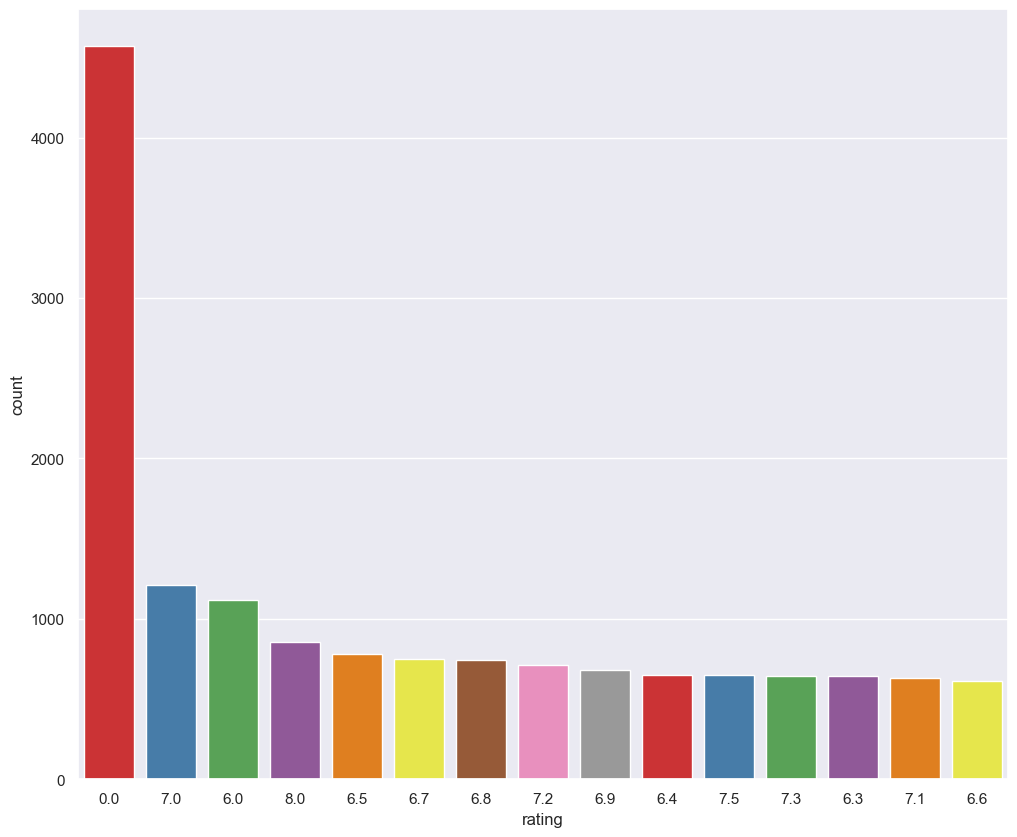

In [ ]:
#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_dataset_2025, palette="Set1", order=netflix_dataset_2025['rating'].value_counts().index[0:15])

In [ ]:
imdb_ratings=pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

In [ ]:
ratings.dropna()
joint_data_2025=ratings.merge(netflix_dataset_2025,left_on='Title',right_on='title',how='inner')
joint_data_2025=joint_data.sort_values(by='Rating', ascending=False)

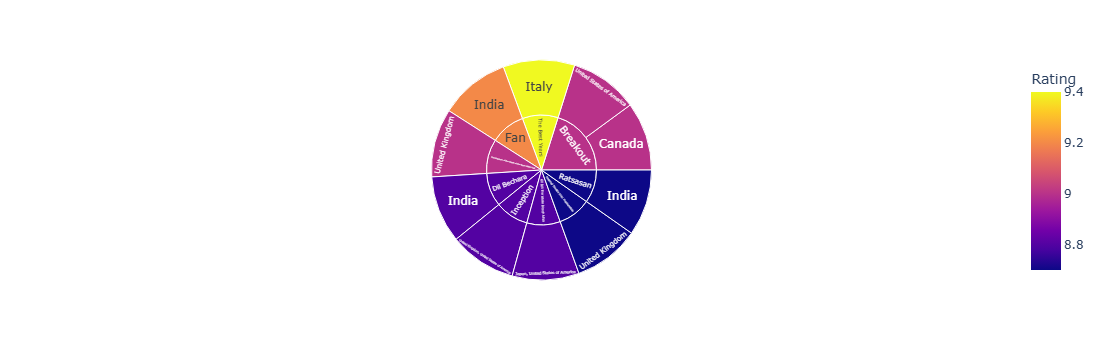

In [ ]:
#Top rated 10 movies in Netflix are:
import plotly.express as px
top_rated=joint_data_2025[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

In [ ]:
#Top countries creating contents
country_count_25=joint_data_2025['country'].value_counts().sort_values(ascending=False)
country_count_25=pd.DataFrame(country_count_25)
topcountries_25=country_count_25[0:11]
topcountries_25

,count
country,
United States of America,2753
United Kingdom,382
India,321
South Korea,260
France,222
"United Kingdom, United States of America",200
Canada,186
Japan,167
"Canada, United States of America",141


In [ ]:
Last_fifteen_years_25 = netflix_dataset_2025[netflix_dataset_2025['release_year']>2005 ]
Last_fifteen_years_25.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,33238,TV Show,Running Man,안재철,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",South Korea,2010-07-11,2010,8.241,1 Seasons,"Comedy, Reality",ko,A reality and competition show where members a...,1929.898,187,8.241,NaN,NaN
1,32415,TV Show,Conan,NaN,"Conan O'Brien, Andy Richter",United States of America,2010-11-08,2010,7.035,1 Seasons,"Talk, Comedy, News",en,A late night television talk show hosted by C...,1670.580,229,7.035,NaN,NaN
2,37757,TV Show,MasterChef Greece,NaN,NaN,Greece,2010-10-03,2010,5.600,1 Seasons,Reality,el,MasterChef Greece is a Greek competitive cooki...,1317.092,6,5.600,NaN,NaN
3,75685,TV Show,Prostřeno!,NaN,"Václav Vydra, Jana Boušková",Czech Republic,2010-03-01,2010,6.500,1 Seasons,Reality,cs,The knives (and forks) are out as a group of s...,1095.776,6,6.500,NaN,NaN
4,33847,TV Show,The Talk,NaN,"Amanda Kloots, Jerry O'Connell, Akbar Gbaja-Bi...","United States of America, Ireland",2010-10-18,2010,3.400,1 Seasons,Talk,en,A panel of well-known news and entertainment p...,712.070,12,3.400,NaN,NaN


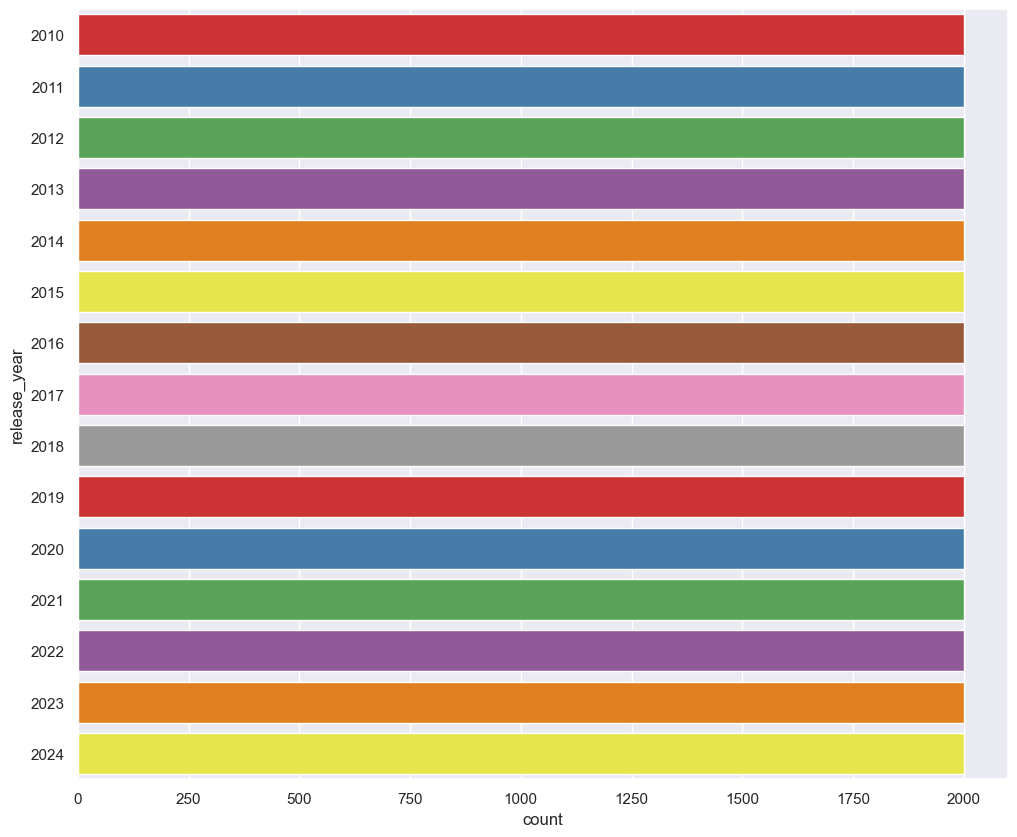

In [ ]:
#Year wise analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set1", order=netflix_dataset_2025['release_year'].value_counts().index[0:15])

In [ ]:
countries_25={}
netflix_shows_25['country']=netflix_shows_25['country'].fillna('Unknown')
cou=list(netflix_shows_25['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries_25.keys()):
            countries_25[i]+=1
        else:
            countries_25[i[0]]=1
    else:
        for j in i:
            if j in list(countries_25.keys()):
                countries_25[j]+=1
            else:
                countries_25[j]=1

In [ ]:
countries_fin_25={}
for country,no in countries_25.items():
    country=country.replace(' ','')
    if country in list(countries_fin_25.keys()):
        countries_fin_25[country]+=no
    else:
        countries_fin_25[country]=no
        
countries_fin_25={k: v for k, v in sorted(countries_fin_25.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStatesofAmerica'),
 Text(1, 0, 'UnitedKingdom'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'SouthKorea'),
 Text(7, 0, 'Ireland'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'Italy')]

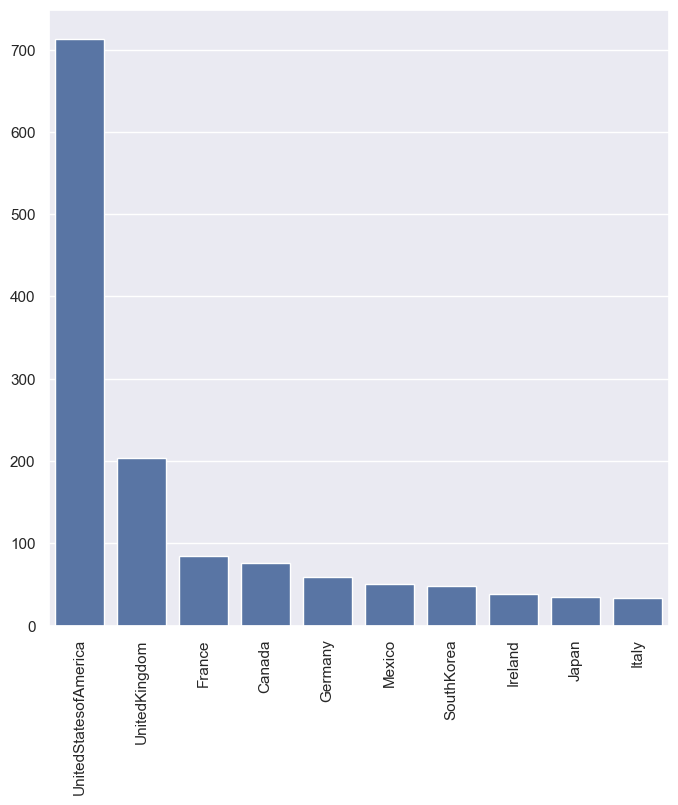

In [ ]:
# Top 10 TV shows creating countries.

plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin_25.keys())[0:10],y=list(countries_fin_25.values())[0:10])
ax.set_xticklabels(list(countries_fin_25.keys())[0:10],rotation = 90)

In [ ]:
#Analysis of duration of movies

netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

AttributeError: Can only use .str accessor with string values!

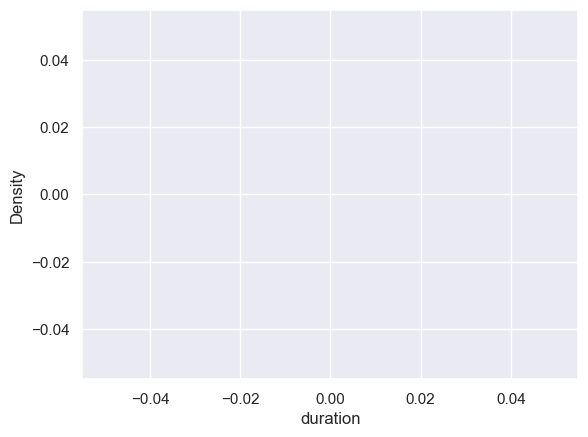

In [ ]:
sns.set(style="darkgrid")
ax=sns.kdeplot(data=netflix_movies['duration'], shade=True)

In [ ]:
# Seleccionar columnas
features = ['title', 'duration']
durations = netflix_dataset_2025[features].copy()

# Limpiar columna 'duration'
durations['no_of_seasons'] = durations['duration'].str.replace(' Season', '', regex=False)
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '', regex=False)

# Eliminar filas con NaN
durations = durations.dropna(subset=['no_of_seasons'])

# Convertir a entero
durations['no_of_seasons'] = durations['no_of_seasons'].astype(int)

# Ver resultado
durations.head()

,title,duration,no_of_seasons
0,Running Man,1 Seasons,1
1,Conan,1 Seasons,1
2,MasterChef Greece,1 Seasons,1
3,Prostřeno!,1 Seasons,1
4,The Talk,1 Seasons,1


In [ ]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [ ]:
#TV shows with largest number of seasons
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

<Axes: xlabel='title'>

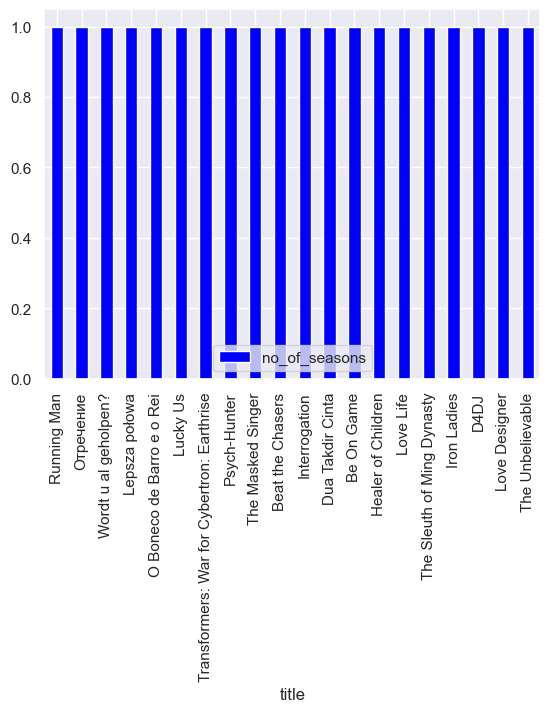

In [ ]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

# Contenido Recomendado del Sistema

In [ ]:
#Plot description based Recommender (Content Based Recommendations)

netflix_dataset_2025['description'].head()

0    A reality and competition show where members a...
1    A late night television talk show hosted by  C...
2    MasterChef Greece is a Greek competitive cooki...
3    The knives (and forks) are out as a group of s...
4    A panel of well-known news and entertainment p...
Name: description, dtype: object

In [ ]:
#Recommedation System(Content Based)

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar datos y crear TF-IDF (ya es disperso por defecto)
tfidf = TfidfVectorizer(stop_words='english')
netflix_dataset_2025['description'] = netflix_dataset_2025['description'].fillna('NaN')
tfidf_matrix = tfidf.fit_transform(netflix_dataset_2025['description'])

# Verificar el tipo de matriz (debe ser CSR o similar)
print(type(tfidf_matrix))  # Debería ser <class 'scipy.sparse.csr_matrix'>

# Convertir a float32 para ahorrar memoria (opcional)
tfidf_matrix = tfidf_matrix.astype(np.float32)
tfidf_matrix.shape

<class 'scipy.sparse._csr.csr_matrix'>


(32000, 54565)

In [ ]:
f5 = tfidf_matrix[:5]
l5 = tfidf_matrix[-5:]
f5_dense = f5.toarray()
l5_dense = l5.toarray()
feature_names = tfidf.get_feature_names_out()
df_f5 = pd.DataFrame(f5_dense, columns=feature_names)
df_l5 = pd.DataFrame(l5_dense, columns=feature_names)
display(df_f5)
display(df_l5)

,00,000,000ft,007,0079,009,0096,00am,00pm,01,...,아이랜드,이달의,챔피언,탐구,ﬁnd,𝐑𝐢𝐧𝐠,𝐑𝐨𝐰𝐞𝐥,𝐨𝐟,𝐬𝐭𝐨𝐫𝐲,𝐭𝐡𝐞
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,00,000,000ft,007,0079,009,0096,00am,00pm,01,...,아이랜드,이달의,챔피언,탐구,ﬁnd,𝐑𝐢𝐧𝐠,𝐑𝐨𝐰𝐞𝐥,𝐨𝐟,𝐬𝐭𝐨𝐫𝐲,𝐭𝐡𝐞
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
from scipy.sparse import csr_matrix

# Calcular similitud fila por fila
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(netflix_dataset_2025.index, index=netflix_dataset_2025['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    title = title.strip().lower()
    
    if title not in indices:
        print(f"❌ Title '{title}' not found in dataset!")
        return None

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    return netflix_dataset['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Welcome')

❌ Title 'welcome' not found in dataset!


In [ ]:
get_recommendations('Avengers: Infinity War')

❌ Title 'avengers: infinity war' not found in dataset!


In [ ]:
get_recommendations('Dil Dhadakne Do')

❌ Title 'dil dhadakne do' not found in dataset!


In [ ]:
#Filling null values with empty string.
filledna=netflix_dataset_2025.fillna('')
filledna.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,33238,TV Show,Running Man,안재철,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",South Korea,2010-07-11,2010,8.241,1 Seasons,"Comedy, Reality",ko,A reality and competition show where members a...,1929.898,187,8.241,,
1,32415,TV Show,Conan,,"Conan O'Brien, Andy Richter",United States of America,2010-11-08,2010,7.035,1 Seasons,"Talk, Comedy, News",en,A late night television talk show hosted by C...,1670.580,229,7.035,,
2,37757,TV Show,MasterChef Greece,,,Greece,2010-10-03,2010,5.600,1 Seasons,Reality,el,MasterChef Greece is a Greek competitive cooki...,1317.092,6,5.600,,
3,75685,TV Show,Prostřeno!,,"Václav Vydra, Jana Boušková",Czech Republic,2010-03-01,2010,6.500,1 Seasons,Reality,cs,The knives (and forks) are out as a group of s...,1095.776,6,6.500,,
4,33847,TV Show,The Talk,,"Amanda Kloots, Jerry O'Connell, Akbar Gbaja-Bi...","United States of America, Ireland",2010-10-18,2010,3.400,1 Seasons,Talk,en,A panel of well-known news and entertainment p...,712.070,12,3.400,,


In [ ]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [ ]:
#Identifying features on which the model is to be filtered.
features=['title','director','cast','genres','description']
filledna=filledna[features]

In [ ]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,index,title,director,cast,genres,description,soup
0,0,runningman,안재철,"yoojae-suk,jeeseok-jin,kimjong-kook,haha,songj...","comedy,reality",arealityandcompetitionshowwheremembersarejoine...,"runningman 안재철 yoojae-suk,jeeseok-jin,kimjong-..."
1,1,conan,,"conano'brien,andyrichter","talk,comedy,news",alatenighttelevisiontalkshowhostedbyconano'brien.,"conan conano'brien,andyrichter talk,comedy,ne..."
2,2,masterchefgreece,,,reality,masterchefgreeceisagreekcompetitivecookinggame...,masterchefgreece reality masterchefgreeceisa...
3,3,prostřeno!,,"václavvydra,janaboušková",reality,theknives(andforks)areoutasagroupofstrangersco...,"prostřeno! václavvydra,janaboušková reality t..."
4,4,thetalk,,"amandakloots,jerryo'connell,akbargbaja-biamila...",talk,apanelofwell-knownnewsandentertainmentpersonal...,"thetalk amandakloots,jerryo'connell,akbargbaj..."


In [ ]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['genres']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

MemoryError: Unable to allocate 7.63 GiB for an array with shape (32000, 32000) and data type float64

In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [ ]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset_2025['title'].iloc[movie_indices]

In [ ]:
get_recommendations_new('Welcome', cosine_sim2)

KeyError: 'welcome'

In [ ]:
get_recommendations_new('Avengers: Infinity War', cosine_sim2)

25001                      Avengers: Endgame
21006                Avengers: Age of Ultron
18000                           The Avengers
22001             Captain America: Civil War
23011                         Thor: Ragnarok
19012                             Iron Man 3
28056                           The Gray Man
20008    Captain America: The Winter Soldier
31066                     The Electric State
14899                                     帝霸
Name: title, dtype: object

In [ ]:
get_recommendations_new('Dil Dhadakne Do', cosine_sim2)

16582    Band Baaja Baaraat
21325       Bajirao Mastani
3783         Chlapi neplačú
8379        Big Top Academy
13293         Sandık Kokusu
14377    Tu Nombre y el Mio
27347              Us Again
28704             PSK Belia
29932                   STW
18460      Jab Tak Hai Jaan
Name: title, dtype: object

In [2]:
get_recommendations_new('Constantine', cosine_sim2)

NameError: name 'get_recommendations_new' is not defined

In [3]:
get_recommendations_new('John Wick', cosine_sim2)

NameError: name 'get_recommendations_new' is not defined

In [4]:
get_recommendations_new('Solo leveling', cosine_sim2)

NameError: name 'get_recommendations_new' is not defined

In [5]:
get_recommendations_new('Spartacus: Dioses de la arena', cosine_sim2)

NameError: name 'get_recommendations_new' is not defined